In [1]:
import numpy as np
from tifffile import imread, imsave
from glob import glob
import random
import tqdm
from matplotlib import pyplot as plt
from sklearn.feature_extraction import image

In [ ]:
import numpy as np
from tifffile import imread, imsave
from glob import glob
import random
import tqdm
from matplotlib import pyplot as plt
from sklearn.feature_extraction import image

In [2]:
X = sorted(glob("/Users/prakash/Desktop/flywing/images/*.tif"))
Y = sorted(glob("/Users/prakash/Desktop/flywing/gt/*.tif"))

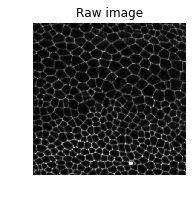

In [3]:
X = list(map(imread,X))
Y = list(map(imread,Y))
plt.subplot(121); plt.imshow(X[9],cmap='gray');   plt.axis('off'); plt.title('Raw image'); plt.show()

In [4]:
rng = np.random.RandomState(42)
ind = rng.permutation(len(X))
n_test = int(round(0.2*len(X)))
ind_pretrn, ind_test = ind[:-n_test], ind[-n_test:]
X_test, Y_test = [X[i] for i in ind_test] , [Y[i] for i in ind_test]
X_pretrn, Y_pretrn = [X[i] for i in ind_pretrn] , [Y[i] for i in ind_pretrn]
print('number of images: %3d' % len(X))
print('- training+validation:       %3d' % len(X_pretrn))
print('- test:     %3d' % len(X_test))

number of images: 210
- training+validation:       168
- test:      42


In [5]:
for i in range(len(X_test)):
    imsave('/Users/prakash/Desktop/flywing/test/images/'+str(i)+'.tif', X_test[i])
    imsave('/Users/prakash/Desktop/flywing/test/gt/'+str(i)+'.tif', Y_test[i])

In [6]:
count =0
for i in range (len(X_pretrn)):
    patchesimages = image.extract_patches_2d(X_pretrn[i], patch_size=(128,128), max_patches=10, random_state=0)
    patchesmasks = image.extract_patches_2d(Y_pretrn[i], patch_size=(128,128), max_patches=10, random_state=0)
    for j in range(0, np.shape(patchesimages)[0]):
        imsave('/Users/prakash/Desktop/flywing/patches/images/'+str(count).zfill(4)+'.tif', patchesimages[j])
        imsave('/Users/prakash/Desktop/flywing/patches/gt/'+str(count).zfill(4)+'.tif', patchesmasks[j])
        count+=1

In [7]:
X_pretrn= sorted(glob('/Users/prakash/Desktop/flywing/patches/images/*.tif'))
Y_pretrn= sorted(glob('/Users/prakash/Desktop/flywing/patches/gt/*.tif'))

In [8]:
X_test = sorted(glob('/Users/prakash/Desktop/flywing/test/images/*.tif'))
Y_test = sorted(glob('/Users/prakash/Desktop/flywing/test/gt/*.tif'))

In [9]:
X_pretrn = list(map(imread,X_pretrn))
Y_pretrn = list(map(imread,Y_pretrn))
X_test = list(map(imread,X_test))
Y_test = list(map(imread,Y_test))

In [10]:
print('- training+validation:       %3d' % len(X_pretrn))
print('- test:     %3d' % len(X_test))

- training+validation:       1680
- test:      42


In [11]:
rng = np.random.RandomState(42)
ind = rng.permutation(len(X_pretrn))
n_val = int(round(0.15 * len(X_pretrn)))
ind_train, ind_val = ind[:-n_val], ind[-n_val:]
X_val, Y_val = [X_pretrn[i] for i in ind_val]  , [Y_pretrn[i] for i in ind_val]
X_train, Y_train = [X_pretrn[i] for i in ind_train]  , [Y_pretrn[i] for i in ind_train]

print('- training:       %3d' % len(X_train))
print('- validation:     %3d' % len(X_val))

- training:       1428
- validation:     252


In [12]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_val = np.array(Y_val)

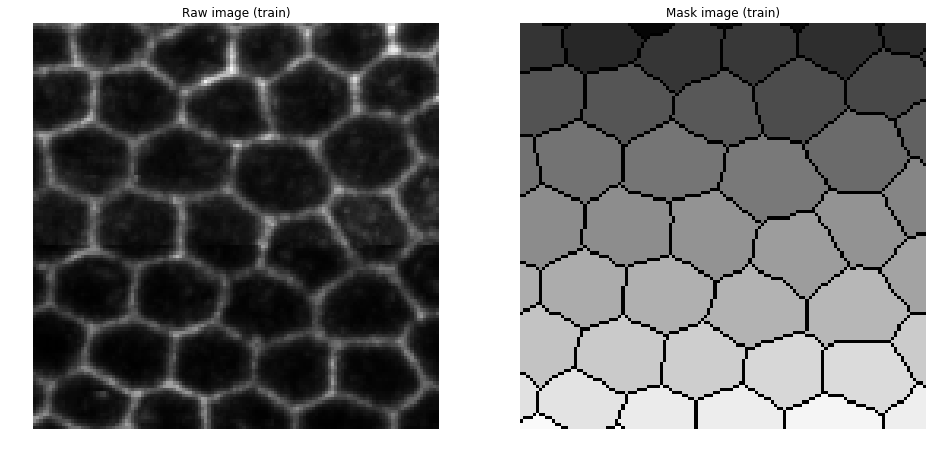

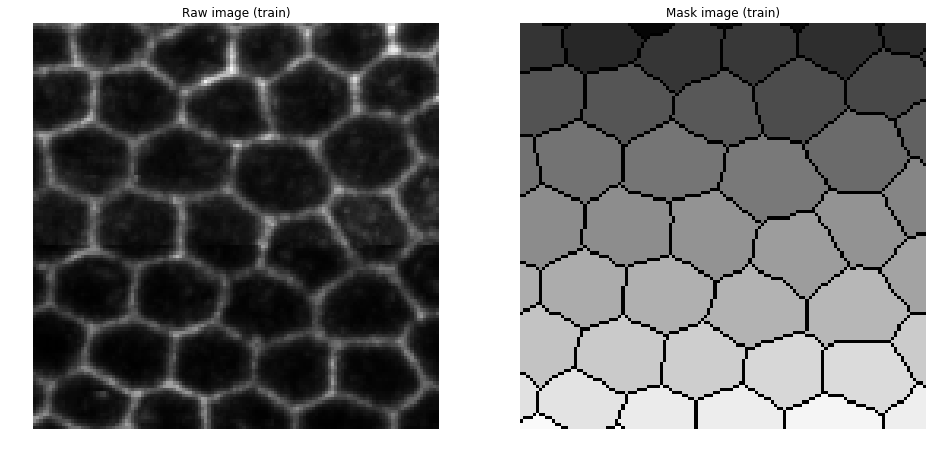

2.0 225.0
0 177


In [14]:
i = 9
img, lbl = X_train[i], Y_train[i]
plt.figure(figsize=(16,10))
plt.subplot(121); plt.imshow(img,cmap='gray');   plt.axis('off'); plt.title('Raw image (train)')
plt.subplot(122); plt.imshow(lbl,cmap='gray');   plt.axis('off'); plt.title('Mask image (train)')
plt.show()
print(np.min(img),np.max(img))
print(np.min(lbl),np.max(lbl))

In [16]:
def noisy(image, sigma):
    
    row,col= image.shape
    mean = 0
    img=np.array(image).astype(np.float32)
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = img + gauss
    return noisy

In [18]:
std=10.0
X_train10 = np.array([noisy(x,std) for x in X_train])
X_test10 = np.array([noisy(x,std) for x in X_test])
X_val10 = np.array([noisy(x,std) for x in X_val])

std=20.0
X_train20 = np.array([noisy(x,std) for x in X_train])
X_test20 = np.array([noisy(x,std) for x in X_test])
X_val20 = np.array([noisy(x,std) for x in X_val])

In [19]:
np.savez_compressed('/Users/prakash/Desktop/flywing/train/train_data_n0.npz', X_train=X_train, Y_train=Y_train, X_val=X_val, Y_val=Y_val)
np.savez_compressed('/Users/prakash/Desktop/flywing/test/test_data_n0.npz', X_test=X_test, Y_test=Y_test)

In [20]:
np.savez_compressed('/Users/prakash/Desktop/flywing/train/train_data_n10.npz', X_train=X_train10, Y_train=Y_train, X_val=X_val10, Y_val=Y_val)
np.savez_compressed('/Users/prakash/Desktop/flywing/test/test_data_n10.npz', X_test=X_test10, Y_test=Y_test)

In [21]:
np.savez_compressed('/Users/prakash/Desktop/flywing/train/train_data_n20.npz', X_train=X_train20, Y_train=Y_train, X_val = X_val20, Y_val = Y_val)
np.savez_compressed('/Users/prakash/Desktop/flywing/test/test_data_n20.npz', X_test=X_test20, Y_test=Y_test)